In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [283]:
data = pd.read_csv ('Bank_Personal_Loan_Modelling.csv')
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [284]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


#### Experience has negative values

In [285]:
data.shape

(5000, 14)

In [286]:
data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

###### Need to change some of the datatypes to categorical before running the model

In [287]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

#### No null values

In [288]:
data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [289]:
data[data['Mortgage'] == 0].shape[0]

3462

In [290]:
data[data['CCAvg'] == 0].shape[0]

106

In [291]:
data ['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [292]:
data ['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [293]:
data ['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [294]:
data ['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [295]:
data['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [296]:
data['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [297]:
data ['Education'].unique()

array([1, 2, 3], dtype=int64)

In [298]:
data ['ZIP Code'].unique()

array([91107, 90089, 94720, 94112, 91330, 92121, 91711, 93943, 93023,
       94710, 90277, 93106, 94920, 91741, 95054, 95010, 94305, 91604,
       94015, 90095, 91320, 95521, 95064, 90064, 94539, 94104, 94117,
       94801, 94035, 92647, 95814, 94114, 94115, 92672, 94122, 90019,
       95616, 94065, 95014, 91380, 95747, 92373, 92093, 94005, 90245,
       95819, 94022, 90404, 93407, 94523, 90024, 91360, 95670, 95123,
       90045, 91335, 93907, 92007, 94606, 94611, 94901, 92220, 93305,
       95134, 94612, 92507, 91730, 94501, 94303, 94105, 94550, 92612,
       95617, 92374, 94080, 94608, 93555, 93311, 94704, 92717, 92037,
       95136, 94542, 94143, 91775, 92703, 92354, 92024, 92831, 92833,
       94304, 90057, 92130, 91301, 92096, 92646, 92182, 92131, 93720,
       90840, 95035, 93010, 94928, 95831, 91770, 90007, 94102, 91423,
       93955, 94107, 92834, 93117, 94551, 94596, 94025, 94545, 95053,
       90036, 91125, 95120, 94706, 95827, 90503, 90250, 95817, 95503,
       93111, 94132,

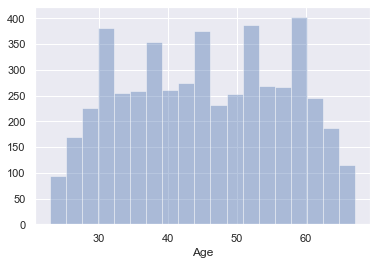

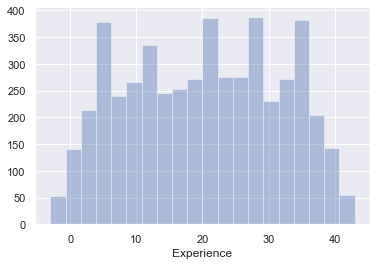

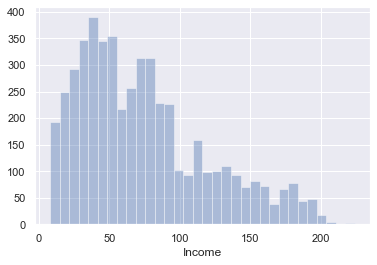

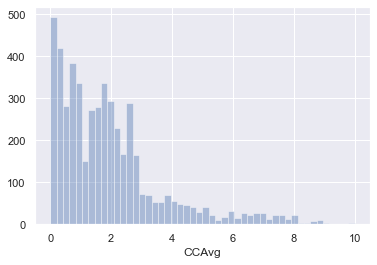

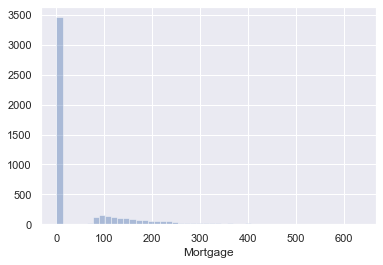

In [247]:
for i in ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']:
    sns.distplot(data[i], kde = False)
    plt.show()

### Age and experience are uniformly distributed. We can also notice that there are some negative values in the experience column. 
### Income and CCAvg are highly right scewed
### Mortgage has a lot of 0s and it cannot be visualized properly. Hence, we will look at it separately.

<AxesSubplot:xlabel='Mortgage'>

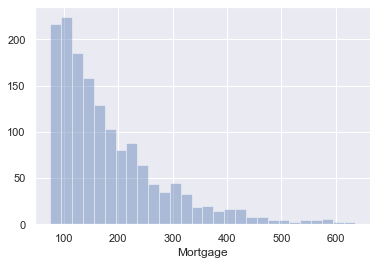

In [16]:
sns.distplot (data.Mortgage[data['Mortgage'] >0], kde = 0)

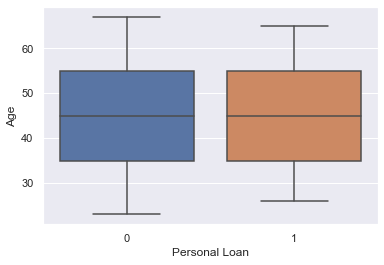

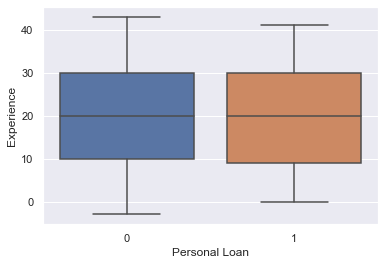

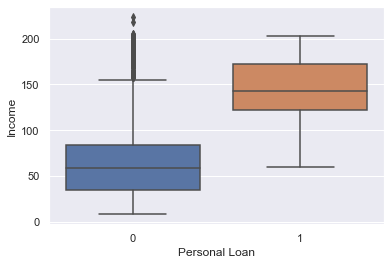

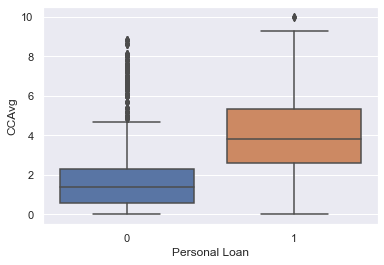

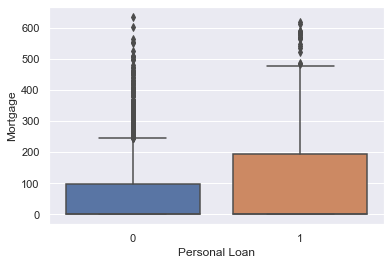

In [18]:
for i in ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']:
    sns.boxplot (data ['Personal Loan'], data[i])
    plt.show()

#### Age and experience are similar for the people who have and haven't bought personal loans. However, people who have bought personal loans seems to have higher income  and we see similar behavior for higher avg. credit card spending and higher mortgage customers. We also notice a lot of outlier points for income, CCAvg and Mortgage especially with people who haven't bought loans.

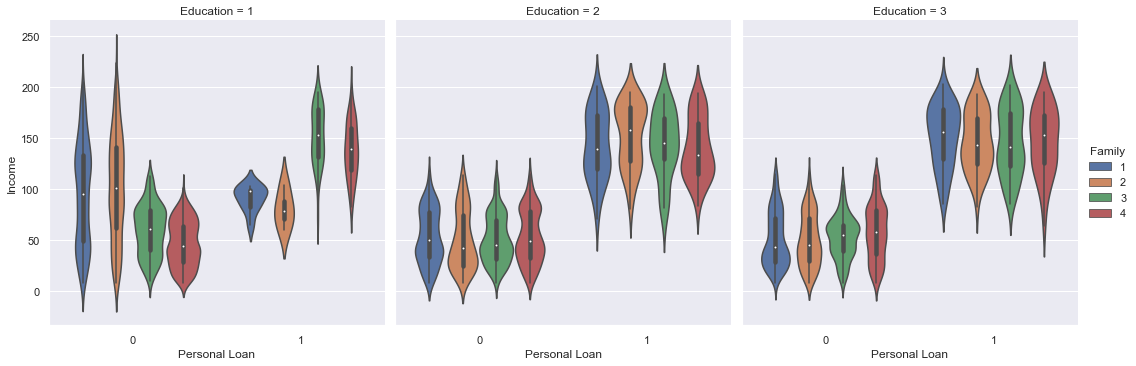

In [19]:
sns.catplot (x = 'Personal Loan', y = 'Income', hue ='Family',  col = 'Education',  data = data,kind = 'violin') 

#### Higher income people are mostly coming from higher education background. Very few undergraduate degree holders bought personal loan 

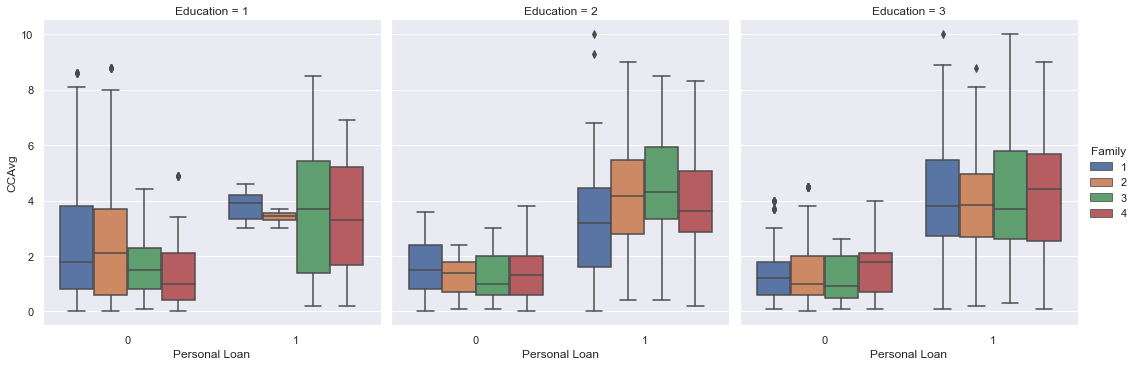

In [20]:
sns.catplot (x = 'Personal Loan', y = 'CCAvg', hue ='Family',  col = 'Education',  data = data,kind = 'box') 

#### Credit card averages are low for people who did not buy loans. People with higher education have bought loans irrespective of family size. 

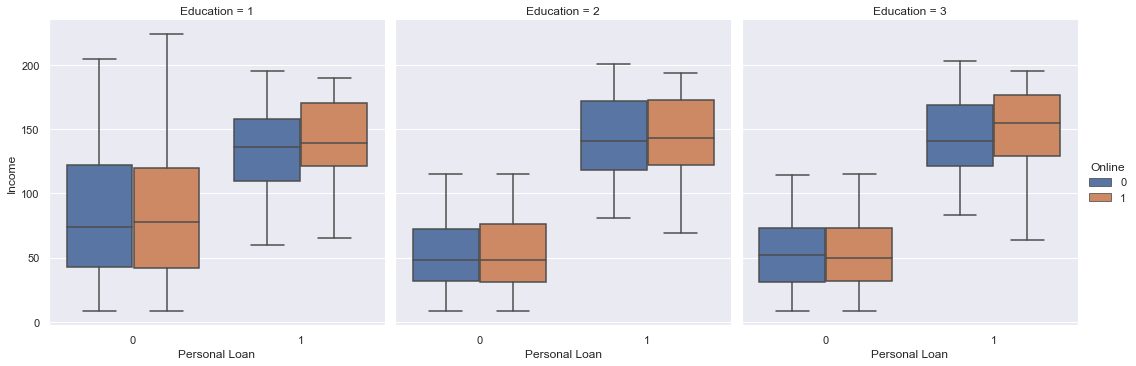

In [21]:
sns.catplot (x = 'Personal Loan', y = 'Income', hue ='Online',  col = 'Education',  data = data,kind = 'box') 

# Getting data ready

In [180]:
data.isnull().sum() 

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [299]:
data[data['Experience']<0].head() #We previously noticed there were negative values in the Experience column

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0


In [183]:
data[data['Experience']<0].shape

(52, 14)

### We have 52 rows which have negative values for experience. Lets see if Experience has any relation to other variables. 

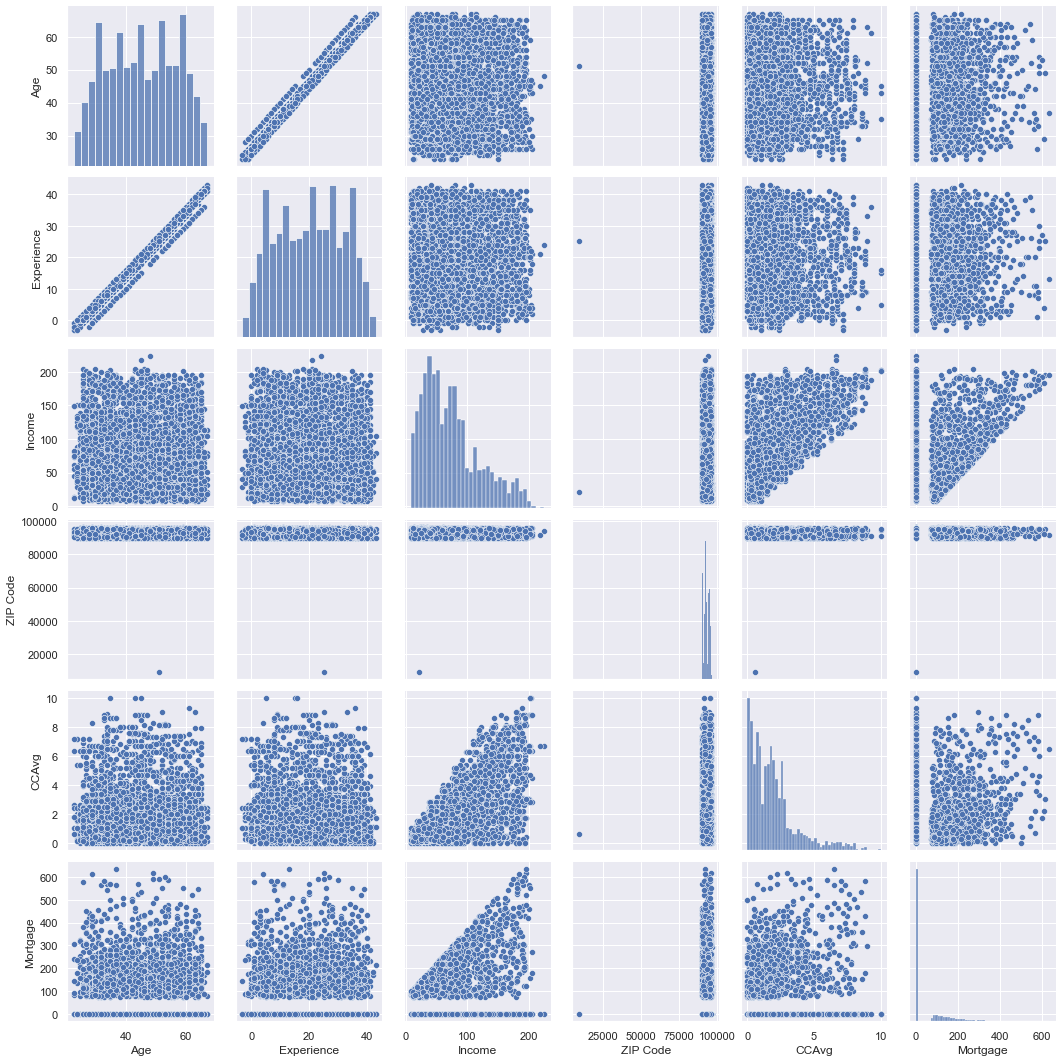

In [184]:
sns.pairplot (data[['Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage']]);

## We can see that age and experience are directly correlated. We can either drop one of them or impute those negative values with a linear relationship with age. 

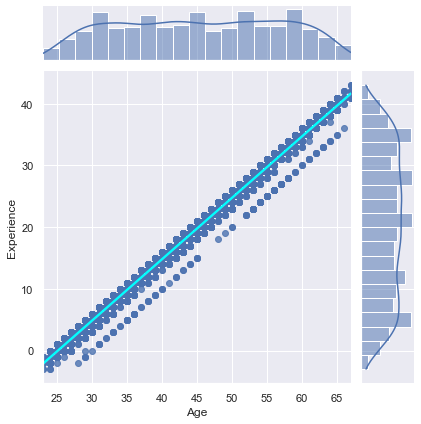

In [186]:
sns.jointplot('Age', 'Experience', data = data, kind = 'reg', joint_kws={'line_kws':{'color':'cyan'}});

In [187]:
import statsmodels.api as sm
x1 = data['Age']
y = data['Experience']
x = sm.add_constant(x1)
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Experience   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 4.282e+05
Date:                Fri, 09 Oct 2020   Prob (F-statistic):               0.00
Time:                        00:03:10   Log-Likelihood:                -8136.4
No. Observations:                5000   AIC:                         1.628e+04
Df Residuals:                    4998   BIC:                         1.629e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -24.9903      0.071   -351.582      0.000     -25.130     -24.851
Age            0.9946      0.002    654.388      0.000       0.992       0.998
==============================================================================
Omnibus:                     1723.970   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6633.035
Skew:                          -1.687   Prob(JB):                         0.00
Kurtosis:                       7.522   Cond. No.                         191.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Intercept is ~ -25 and gradient is ~1. That means in this data people with below 25 years have zero experience and then it linearly increases by age. 

In [190]:
# Here let's replace the negative values with positive or zeros based on age using the above relationship.
z = data[data['Experience'] < 0]
z['Experience'] = z['Age'] - 25
z['Experience'] = np.where (z.Experience < 0, 0, z.Experience)
data.update(z)

In [191]:
data[data['Experience']<0].head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [192]:
data.dtypes #Let's check if categorical variables are assigned proper data types

ID                    float64
Age                   float64
Experience            float64
Income                float64
ZIP Code              float64
Family                float64
CCAvg                 float64
Education             float64
Mortgage              float64
Personal Loan         float64
Securities Account    float64
CD Account            float64
Online                float64
CreditCard            float64
dtype: object

In [248]:
data['Family'] = data['Family'].astype('category')
data['Education'] = data['Education'].astype('category')
data['Personal Loan'] = data['Personal Loan'].astype('category')
data['Securities Account'] = data['Securities Account'].astype('category')
data['CD Account'] = data['CD Account'].astype('category')
data['Online'] = data['Online'].astype('category')
data['CreditCard'] = data['CreditCard'].astype('category')
data['ZIP Code'] = data['ZIP Code'].astype('category')

In [249]:
data.dtypes

ID                       int64
Age                      int64
Experience               int64
Income                   int64
ZIP Code              category
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan         category
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object

In [195]:
data_drop1 = data.drop(['ID'], axis = 1) ## droping ID as we know its a one on one mapping and don't need it. 

## Logistic regression

In [250]:
X1 = data_drop1.drop ('Personal Loan', axis =1) 
Y1 = data_drop1 ['Personal Loan']

In [251]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,Y1, test_size = 0.3, random_state = 1)

In [252]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score
logreg1 = LogisticRegression(random_state=1)
logreg1.fit(X1_train, y1_train )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [253]:
y1_predict = logreg1.predict(X1_test)

In [200]:
res1 = X1_test.copy()
res1['Observed Personal Loan'] = y1_test
res1['Predicted Personal Loan'] = y1_predict
res1.head(10)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Observed Personal Loan,Predicted Personal Loan
2764,31.0,5.0,84.0,91320.0,1.0,2.9,3.0,105.0,0.0,0.0,0.0,1.0,0.0,0.0
4767,35.0,9.0,45.0,90639.0,3.0,0.9,1.0,101.0,1.0,0.0,0.0,0.0,0.0,0.0
3814,34.0,9.0,35.0,94304.0,3.0,1.3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3499,49.0,23.0,114.0,94550.0,1.0,0.3,1.0,286.0,0.0,0.0,1.0,0.0,0.0,0.0
2735,36.0,12.0,70.0,92131.0,3.0,2.6,2.0,165.0,0.0,0.0,1.0,0.0,0.0,0.0
3922,31.0,4.0,20.0,95616.0,4.0,1.5,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2701,50.0,26.0,55.0,94305.0,1.0,1.6,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1179,36.0,11.0,98.0,90291.0,3.0,1.2,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
932,51.0,27.0,112.0,94720.0,3.0,1.8,2.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
792,41.0,16.0,98.0,93117.0,1.0,4.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [254]:
def draw_cm (actual1, predicted1):
    cm = confusion_matrix(actual1, predicted1)
    sns.heatmap(cm, annot=True,  fmt='.2f')
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.9091428571428571
Testing accuracy 0.9073333333333333
Confusion Matrix


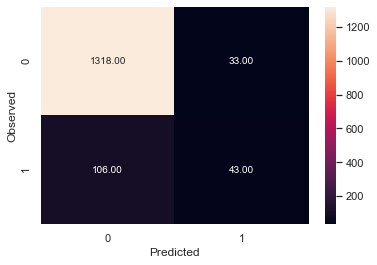

None
Recall: 0.28859060402684567
Precision: 0.5657894736842105
F1 Score: 0.38222222222222224
Roc Auc Score: 0.632082126587812


In [255]:
print("Trainig accuracy",logreg1.score(X1_train,y1_train))  
print("Testing accuracy",logreg1.score(X1_test, y1_test))
print('Confusion Matrix')
print(draw_cm(y1_test,y1_predict))
print("Recall:",recall_score(y1_test,y1_predict))
print("Precision:",precision_score(y1_test,y1_predict))
print("F1 Score:",f1_score(y1_test,y1_predict))
print("Roc Auc Score:",roc_auc_score(y1_test,y1_predict))

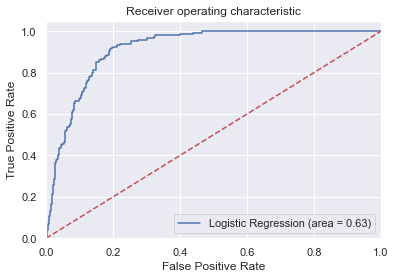

In [268]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logreg1_roc_auc = roc_auc_score(y1_test, logreg1.predict(X1_test))
fpr, tpr, thresholds = roc_curve(y1_test, logreg1.predict_proba(X1_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logreg1_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [269]:
res2 = pd.DataFrame()
res2['Col'] = X1_train.columns
res2['Coeff'] = np.round(abs(logreg1.coef_[0]),2)
res2.sort_values(by='Coeff',ascending=False)

,Col,Coeff
2,Income,0.04
4,Family,0.02
6,Education,0.02
5,CCAvg,0.01
0,Age,0.00
1,Experience,0.00
3,ZIP Code,0.00
7,Mortgage,0.00
8,Securities Account,0.00
9,CD Account,0.00


### We can notice that the values are very small, it is possible that some large numbers in a column might be affecting rest of the results. Let's try dropping another variable which is ZIP code and see if that changes the results.

In [300]:
data_drop2 = data.drop ( ['ID', 'ZIP Code'], axis = 1)

In [301]:
X2 = data_drop2.drop ('Personal Loan', axis =1) 
Y2 = data_drop2 ['Personal Loan'].astype('category')

In [302]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size= 0.3, random_state = 1 )

In [303]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score
logreg2 = LogisticRegression(random_state=1)
logreg2.fit(X2_train, y2_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [304]:
y2_predict = logreg2.predict(X2_test)

In [305]:
res3 = X2_test.copy()
res3['Observed Personal Loan'] = y2_test
res3['Predicted Personal Loan'] = y2_predict
res3.head(10)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Observed Personal Loan,Predicted Personal Loan
2764,31,5,84,1,2.9,3,105,0,0,0,1,0,0
4767,35,9,45,3,0.9,1,101,1,0,0,0,0,0
3814,34,9,35,3,1.3,1,0,0,0,0,0,0,0
3499,49,23,114,1,0.3,1,286,0,0,1,0,0,0
2735,36,12,70,3,2.6,2,165,0,0,1,0,0,0
3922,31,4,20,4,1.5,2,0,0,0,1,0,0,0
2701,50,26,55,1,1.6,2,0,0,0,1,0,0,0
1179,36,11,98,3,1.2,3,0,1,0,0,1,0,0
932,51,27,112,3,1.8,2,0,1,1,1,1,0,0
792,41,16,98,1,4.0,3,0,0,0,0,1,0,0


In [306]:
def get_cm(actual2, predicted2):
    cm = confusion_matrix(actual2, predicted2)
    sns.heatmap (cm, annot = True)
    plt.ylabel('observed')
    plt.xlabel('predicted')

Trainig accuracy 0.952
Testing accuracy 0.9446666666666667
Confusion Matrix
None
Recall: 0.5637583892617449
Precision: 0.8235294117647058
F1 Score: 0.6693227091633467
Roc Auc Score: 0.7752174625805395


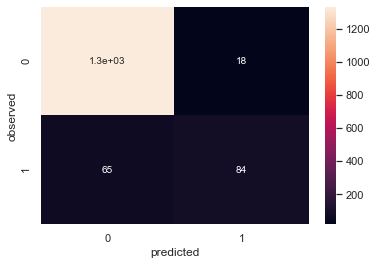

In [307]:
print("Trainig accuracy",logreg2.score(X2_train,y2_train))  
print("Testing accuracy",logreg2.score(X2_test, y2_test))
print('Confusion Matrix')
print(get_cm(y2_test,y2_predict))
print("Recall:",recall_score(y2_test,y2_predict))
print("Precision:",precision_score(y2_test,y2_predict))
print("F1 Score:",f1_score(y2_test,y2_predict))
print("Roc Auc Score:",roc_auc_score(y2_test,y2_predict))

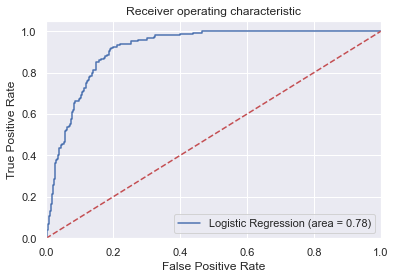

In [308]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logreg2_roc_auc = roc_auc_score(y2_test, logreg2.predict(X2_test))
fpr2, tpr2, thresholds2 = roc_curve(y2_test, logreg2.predict_proba(X2_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logreg2_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### We can see that dropping zipcode has increased the accuracy of the model to 0.95 and also increased precision, recall, F1 score. 
### The ROC has increased from 0.63 to 0.78 (15% increase). Most importantly we can see increase in TP values and reduction in FN and FP values.

Testing accuracy 0.99
Confusion Matrix
None
Recall: 0.5167785234899329
Precision: 0.8850574712643678
F1 Score: 0.652542372881356
Roc Auc Score: 0.7546882994947813


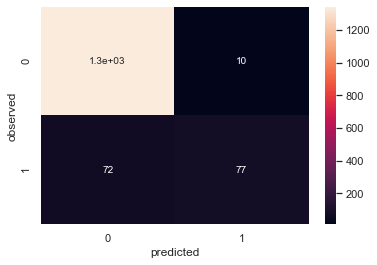

In [309]:
THRESHOLD = 0.6
new_y_predict = np.where(logreg2.predict_proba(X2_test)[:,1] > THRESHOLD, 1, 0)
 
print("Testing accuracy",logreg2.score(X2_test, new_y_predict))
print('Confusion Matrix')
print(get_cm(y2_test,new_y_predict))
print("Recall:",recall_score(y2_test,new_y_predict))
print("Precision:",precision_score(y2_test,new_y_predict))
print("F1 Score:",f1_score(y2_test,new_y_predict))
print("Roc Auc Score:",roc_auc_score(y2_test,new_y_predict))


### Increasing the threshold value from 0.5 to 0.6 has resulted in higher accuracy of 0.99. However, it has affected the TP and reduced the ROC to 0.75. 

Testing accuracy 0.9913333333333333
Confusion Matrix
None
Recall: 0.5973154362416108
Precision: 0.7739130434782608
F1 Score: 0.6742424242424242
Roc Auc Score: 0.7890352162703244


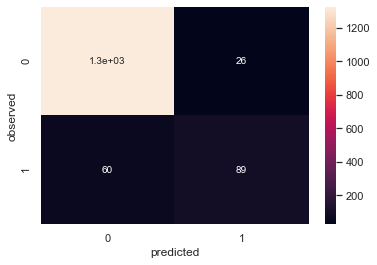

In [280]:
THRESHOLD = 0.4
new_y_predict = np.where(logreg2.predict_proba(X2_test)[:,1] > THRESHOLD, 1, 0)
 
print("Testing accuracy",logreg2.score(X2_test, new_y_predict))
print('Confusion Matrix')
print(get_cm(y2_test,new_y_predict))
print("Recall:",recall_score(y2_test,new_y_predict))
print("Precision:",precision_score(y2_test,new_y_predict))
print("F1 Score:",f1_score(y2_test,new_y_predict))
print("Roc Auc Score:",roc_auc_score(y2_test,new_y_predict))


### Decreasing the threshold value from 0.5 to 0.4 has also resulted in higher accuracy of 0.99. However, it has affected the FP. Depending on the scope of business, we can try altering the threshold to reach the most optimum value. 
### In this case, decreasing the FP seems to be smart choice. If we give loan to people who might default, then that will cost a lot of money to the bank. 

In [267]:
res4 = pd.DataFrame()
res4['Col'] = X2_train.columns
res4['Coeff'] = np.round(abs(logreg2.coef_[0]),2)
res4.sort_values(by='Coeff',ascending=False)

,Col,Coeff
8,CD Account,3.26
5,Education,1.66
10,CreditCard,1.01
7,Securities Account,0.89
3,Family,0.65
9,Online,0.58
0,Age,0.41
1,Experience,0.40
4,CCAvg,0.16
2,Income,0.05


### From this model we are able to predict the customers who would buy personal loans. The main factors affecting the model are CD account along with education and credit card from the bank

### The bank should target the CD account holders with higher education (because we saw before that higher education people have higher income) and who uses the bank's credit card.

### This way we are targeting the most probable population who might become our future personal loan holders of the bank.